<h1 style="text-align: center;"><strong>Severity of Car Accidents Classification</strong></h1>

<br>
<h2>Project Overview</h2>

This project is a capstone project for Data analysis course on Corsera, which is set up by IBM. During this project a dataset of car accidents will be analysed using Python. The dataset has many attributes which would provide us with a wide range of information on different circumstances surrounding the accidents. First, the data will be analysed to understand the attributes and which information would be useful for our analysis. Then the most suitable machine learning technique would be chosen to set up a model to predict severity future accidents. Finally, the model will be deployed and tested to check the accuracy of the set up model.

<h3>Libraries to be used in the analysis</h3>

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import datasets
from sklearn.tree import export_graphviz
import cv2
%matplotlib inline 

<h2>Problem Description</h2>

Car accidents is a serious problem and lead to heavy losses on both human lives and money. During recent years and with the advancments in technology and safety in cars, nomber of fatalities has been decreasing continiously. Also the safety and organizational parameters for traffic have been conducted by many governments, which also helped a lot in decreasing the nomber of accidents. However, there are still accidents and they are not completely prevented. Hence, it would be a great advantage to be able to predict the most common type of accidents and their respective severity, so that we concentrate our efforts on these severe types of accidents and try to minimize them. Therefore a dataset is being analysed during this notebook and then a model will be created which will predict the severity of car accidents depending on a wide range of significant attributes.


<h2>Data Understanding</h2>

The target of this project is accidents severity, hence a labeled dataset with accidents severity types is needed and of course various attributes to create a more inclusive model. There are many sources to get such dataset, however a sample dataset provided by Corsera will be used during the course of this notebook and can be found <a href='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'>here</a>. The dataset consists of all types of accidents in the city of Seattle since the year 2004. It has 38 attributes, 194673 observations and contains attribute for accidents severity (our target). Moreover, the significance of attributes will be assessed and then chosen accordingly. The unused attributes will be droped out of our dataset and the missing values will be dealt with during preprocessing. Since grouping of already labeled accidents severity is the objective, Classification learning algorithm will be implemented (Supervised learning) to create the intended model. 

In [3]:
#importing the dataset
df=pd.read_csv('Data-Collisions.csv',low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print(df.columns)
print(df.shape)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
(194673, 38)


<h4>Examining Target Variable</h4>

In [5]:
print(df['SEVERITYCODE'].value_counts())
df['SEVERITYDESC'].value_counts(normalize=True)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


Property Damage Only Collision    0.701099
Injury Collision                  0.298901
Name: SEVERITYDESC, dtype: float64

<br>
<p>Our Target is grouped into two labeled groups:</p>
<ul>
<li>Group1: Property Damage Only collision</li>
<li>Group2: Injury Collisions</li>
</ul>  
We will try to create a model to group accident severity accordingly

Furthermore, it is clear that our target variable is imbalanced, where more than half of the observations lie in severity group 1 and this could affect our model and make it more biased to the greater class. Hence, we need to figure out an approach to handle such imbalance.
There are many ways we can handle such problem such as:
<ul>
    <li>Up sampling the minority class (value=2) where we try to replicate random values of smaller class to increase their nomber and balance with greater class</li>
    <li>Down sampling the majority class (value=2) where we try to remove random values of greater class to decrease their nomber and balance with smaller class</li>
    <li>Use specific classification algorithm, which works well with imbalanced data such as Desicion Tree</li>
    <li>Divide the greater class into two distinct groups, then apply the model on both groups, then evaluate the accuracy of both models and get the average</li>

In this project we will use the last option from above in dealing with the imbalanced target variable. This will be carried out in preprocessing stage

<h4>Choosing Attributes</h4>

Choosing the most suitable features for the model can be hard especially of the dataset used has many attributes, because choosing too many attributes might lead to overfitting, which affects the accuracy of our model.
Moreover, since this is a Car accident severity test then weather, road lighting, road conditions and main idea about the common locations of accidents must be taken into consideration. Also, it will be helpful to check for accidents during different days of the week. Hence, the features to be used in the model are: 
<ul>
    <li>ADDRTYPE</li>
    <li>WEATHER</li>
    <li>LIGHTCOND</li>
    <li>ROADCOND</li>
    <li>INCDATE</li>
</ul>    

<h2>Data Preparation and Preprocessing</h2>
<p>Now the data will be chosen and prepared for the classification model. Unused columns will be droped and missing values will be dealt with.</p>
<h4>Examining data</h4>

Since the target of this project is creating a classification model, all the object values need to be changed to numeric values. This can be done through either get_dummies() method or using LabelEncoder. It is also very helpful to visualize data to have a better understanding of the features, however the dataset used for this project is mostly of datatype object (string). Therefore, visualization in this project would be hard to implement.



In [6]:
#Checking data types of the chosen columns
df[['ADDRTYPE','WEATHER','LIGHTCOND','ROADCOND','INCDATE','SEVERITYCODE']].dtypes

ADDRTYPE        object
WEATHER         object
LIGHTCOND       object
ROADCOND        object
INCDATE         object
SEVERITYCODE     int64
dtype: object

Before starting our model, null values need to be dealt with. Since null values are object values then they can be dealt with  either:
* Using probability and analyzing to predict the correct missing value like for example if the road is wet, then may be the weather was raining. 
* Using the most frequent observation (mode)
* Dropping the rows containing these null values
* Just add 0 on using get_dummies() method. 

Since this is a preliminary project, hence for simplicity and maintaining accuracy of our model, rows of missing values in multiple columns will be dropped, while rows with missing values in only one column will remain and get zero on applying get_dummies method().

In [7]:
#checking null values
df[['ADDRTYPE','WEATHER','LIGHTCOND','ROADCOND','INCDATE','SEVERITYCODE']].isnull().sum(axis=0)

ADDRTYPE        1926
WEATHER         5081
LIGHTCOND       5170
ROADCOND        5012
INCDATE            0
SEVERITYCODE       0
dtype: int64

Since the null values in WEATHER, LIGHTCOND, ROADCOND are the most then the rows which have null values in these three columns at the same time will be removed.

In [8]:
attributes=df[['ADDRTYPE','WEATHER','LIGHTCOND','ROADCOND','INCDATE','SEVERITYCODE']]
print(attributes.columns)
#Dropping the rows after getting their indicies
nomber=attributes[attributes.WEATHER.isnull() & attributes.LIGHTCOND.isnull() & attributes.ROADCOND.isnull()].index.values
attributes=attributes.drop(nomber,axis=0).reset_index()
attributes.drop('index',axis=1,inplace=True)
attributes.head()

Index(['ADDRTYPE', 'WEATHER', 'LIGHTCOND', 'ROADCOND', 'INCDATE',
       'SEVERITYCODE'],
      dtype='object')


,ADDRTYPE,WEATHER,LIGHTCOND,ROADCOND,INCDATE,SEVERITYCODE
0,Intersection,Overcast,Daylight,Wet,2013/03/27 00:00:00+00,2
1,Block,Raining,Dark - Street Lights On,Wet,2006/12/20 00:00:00+00,1
2,Block,Overcast,Daylight,Dry,2004/11/18 00:00:00+00,1
3,Block,Clear,Daylight,Dry,2013/03/29 00:00:00+00,1
4,Intersection,Raining,Daylight,Wet,2004/01/28 00:00:00+00,2


<h4>Examining Feature Columns</h4>

Checking LIGHTCOND

In [9]:
attributes.LIGHTCOND.value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

We are interested to know wheather the road is light or dark, hence it is obvious that there are simmilar values which can be combined like Dark - No Street Lights, Dark - Street Lights Off and Dark - Unknown Lighting. Unkown andd Other will be dropped.   

In [10]:
#creating dummy variables of the column and saving it in temporary dataframe
light_df=pd.get_dummies(attributes['LIGHTCOND'])
#Combining the values of three columns into one column called Dark
light_df['Dark']=light_df.apply(lambda row: 1 if row['Dark - Street Lights Off']==1 or row['Dark - Unknown Lighting']==1
                              or row['Dark - No Street Lights']==1 else 0,axis=1)
#dropping unused columns
light_df.drop(['Unknown','Other','Dark - Street Lights Off','Dark - No Street Lights','Dark - Unknown Lighting'],axis=1,inplace=True)

#merging the temp dataframe to the real dataframe
attributes=pd.concat([attributes,light_df],axis=1)
attributes.drop('LIGHTCOND',axis=1,inplace=True)
attributes.head()

,ADDRTYPE,WEATHER,ROADCOND,INCDATE,SEVERITYCODE,Dark - Street Lights On,Dawn,Daylight,Dusk,Dark
0,Intersection,Overcast,Wet,2013/03/27 00:00:00+00,2,0,0,1,0,0
1,Block,Raining,Wet,2006/12/20 00:00:00+00,1,1,0,0,0,0
2,Block,Overcast,Dry,2004/11/18 00:00:00+00,1,0,0,1,0,0
3,Block,Clear,Dry,2013/03/29 00:00:00+00,1,0,0,1,0,0
4,Intersection,Raining,Wet,2004/01/28 00:00:00+00,2,0,0,1,0,0


Checking ROADCOND

In [11]:
attributes.ROADCOND.value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Our main concer is wheather the road is dry or wet, while other cases are too few and can be neglected

In [12]:
#creating dummy variables of the column and saving it in temporary dataframe
road_df=pd.get_dummies(attributes['ROADCOND'])

#Using columns of dry and wet only
road_df=road_df[['Dry','Wet']]

#merging the temp dataframe to the real dataframe
attributes=pd.concat([attributes,road_df],axis=1)
attributes.drop('ROADCOND',axis=1,inplace=True)
attributes.head()

,ADDRTYPE,WEATHER,INCDATE,SEVERITYCODE,Dark - Street Lights On,Dawn,Daylight,Dusk,Dark,Dry,Wet
0,Intersection,Overcast,2013/03/27 00:00:00+00,2,0,0,1,0,0,0,1
1,Block,Raining,2006/12/20 00:00:00+00,1,1,0,0,0,0,0,1
2,Block,Overcast,2004/11/18 00:00:00+00,1,0,0,1,0,0,1,0
3,Block,Clear,2013/03/29 00:00:00+00,1,0,0,1,0,0,1,0
4,Intersection,Raining,2004/01/28 00:00:00+00,2,0,0,1,0,0,0,1


Checking WEATHER

In [13]:
attributes.WEATHER.value_counts(normalize=True)

Clear                       0.586180
Raining                     0.174823
Overcast                    0.146177
Unknown                     0.079597
Snowing                     0.004784
Other                       0.004388
Fog/Smog/Smoke              0.003001
Sleet/Hail/Freezing Rain    0.000596
Blowing Sand/Dirt           0.000295
Severe Crosswind            0.000132
Partly Cloudy               0.000026
Name: WEATHER, dtype: float64

Obviously Clear, Raining and Overcast are the most significant and other values are too small.

In [14]:
#creating dummy variables of the column and saving it in temporary dataframe
weather_df=pd.get_dummies(attributes['WEATHER'])

#Using columns of Clear, Raining and Overcast only
weather_df=weather_df[['Clear', 'Raining', 'Overcast']]

#merging the temp dataframe to the real dataframe
attributes=pd.concat([attributes,weather_df],axis=1)
attributes.drop('WEATHER',axis=1,inplace=True)
attributes.head()

,ADDRTYPE,INCDATE,SEVERITYCODE,Dark - Street Lights On,Dawn,Daylight,Dusk,Dark,Dry,Wet,Clear,Raining,Overcast
0,Intersection,2013/03/27 00:00:00+00,2,0,0,1,0,0,0,1,0,0,1
1,Block,2006/12/20 00:00:00+00,1,1,0,0,0,0,0,1,0,1,0
2,Block,2004/11/18 00:00:00+00,1,0,0,1,0,0,1,0,0,0,1
3,Block,2013/03/29 00:00:00+00,1,0,0,1,0,0,1,0,1,0,0
4,Intersection,2004/01/28 00:00:00+00,2,0,0,1,0,0,0,1,0,1,0


Checking ADDRTYPE

In [15]:
print(attributes.ADDRTYPE.isnull().sum(axis=0))
attributes.ADDRTYPE.value_counts(normalize=True)

1818


Block           0.657843
Intersection    0.338192
Alley           0.003965
Name: ADDRTYPE, dtype: float64

Since we want to minimize the nomber of columns to avoid overfitting, it is better to use LabelEncoder than get_dummies(). However, we can't use it while there are null values. So we can add in the null values the value Alley since it is already too small compared to the others and even by adding null values to it, it will remain too small compared to other values. Hence, it won't affect the overall percentage of distribution much.

In [16]:
#replacing null values with Alley
attributes.ADDRTYPE.fillna('Alley',inplace=True)

#To prove the percantage of values won't change much uncomment below line
#print(attributes.ADDRTYPE.value_counts(normalize=True))

#Use labelEncoder to transform ADDRTYPE column into numeric
LE_ADDR=LabelEncoder().fit(['Block','Intersection','Alley'])
attributes['ADDRTYPE']=LE_ADDR.transform(attributes['ADDRTYPE'])
attributes.head()

,ADDRTYPE,INCDATE,SEVERITYCODE,Dark - Street Lights On,Dawn,Daylight,Dusk,Dark,Dry,Wet,Clear,Raining,Overcast
0,2,2013/03/27 00:00:00+00,2,0,0,1,0,0,0,1,0,0,1
1,1,2006/12/20 00:00:00+00,1,1,0,0,0,0,0,1,0,1,0
2,1,2004/11/18 00:00:00+00,1,0,0,1,0,0,1,0,0,0,1
3,1,2013/03/29 00:00:00+00,1,0,0,1,0,0,1,0,1,0,0
4,2,2004/01/28 00:00:00+00,2,0,0,1,0,0,0,1,0,1,0


Let's Check the severity accross different days of the week

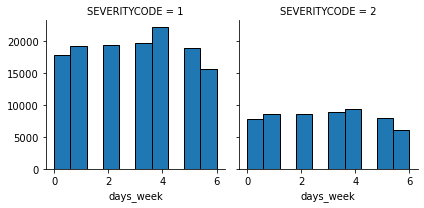

In [17]:
#Convert to INCDATE datetime object
attributes['INCDATE']=pd.to_datetime(attributes['INCDATE'])

#Creating new column for days of the week
attributes['days_week']=attributes['INCDATE'].dt.dayofweek

#visualizing the distribution of accidents severity along the days of the week
g=sns.FacetGrid(attributes, col='SEVERITYCODE',palette="Set1", col_wrap=2)
g.map(plt.hist, 'days_week', ec="k")
plt.show()

The graph shows an increase in nombers of accidents slightly at day 4 of the week, which is end of the week. Hence, we can set day 4 as our threshold day

In [18]:
#creating new column representing either a weekend or not
attributes['weekend']=attributes.days_week.apply(lambda x: 1 if x>3 else 0)

#dropping unused columns
attributes.drop(['INCDATE','days_week'],axis=1,inplace=True)
attributes.head()

,ADDRTYPE,SEVERITYCODE,Dark - Street Lights On,Dawn,Daylight,Dusk,Dark,Dry,Wet,Clear,Raining,Overcast,weekend
0,2,2,0,0,1,0,0,0,1,0,0,1,0
1,1,1,1,0,0,0,0,0,1,0,1,0,0
2,1,1,0,0,1,0,0,1,0,0,0,1,0
3,1,1,0,0,1,0,0,1,0,1,0,0,1
4,2,2,0,0,1,0,0,0,1,0,1,0,0


<h4>Balancing the Target</h4>

Now we will deal with the imbalance in the data as discussed above by dividing the larger severity group and then appending each half to the same smaller severity group.

In [33]:
major_class=attributes[attributes['SEVERITYCODE']==1]
minor_class=attributes[attributes['SEVERITYCODE']==2]

#dividing the majority class
major_class_first,major_class_second=train_test_split(major_class,test_size=0.5,random_state=0)

#Models from which we can set our two Y variables (dependant variables) and X variables (independant variables)
model1=minor_class.append(major_class_first)
model2=minor_class.append(major_class_second)

<h4>Setting Dependent and Independent variables</h4>

In [20]:
#Setting independent variables and saving then as numpy arrays
X1=model1.drop('SEVERITYCODE',axis=1).values
X2=model2.drop('SEVERITYCODE',axis=1).values

#Setting dependent variables and saving then as numpy arrays
Y1=model1.SEVERITYCODE.values
Y2=model2.SEVERITYCODE.values

Since the values are mostly 0 and 1 normalization is not necessary and the variables are ready for classification now.

<h4>Train Test Split</h4>


Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [21]:
#Splitting first model into train and test sets with 20% as test
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=0)

#Splitting second model into train and test sets with 20% as test
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.2,random_state=0)


<h2>Classification</h2>

Different Classification algorithms would be implemented in this project and their respective accuracy would be calculated and compared.

Since the data has a lot of observations and not to consume to much time we will use:
* Decision Trees
* Logistic Regression


<h3>Decision Trees</h3>

In [43]:
#model 1 and accuaracy calculations
drugTree_1 = DecisionTreeClassifier(criterion="entropy").fit(X1_train,Y1_train)
Y_hat_model1=drugTree_1.predict(X1_test)
print('Jaccard index for model 1 is', metrics.jaccard_similarity_score(Y1_test,Y_hat_model1))
print('F1_score for model 1 is', metrics.f1_score(Y1_test,Y_hat_model1))

#model 2 and accuaracy calculations
drugTree_2 = DecisionTreeClassifier(criterion="entropy").fit(X2_train,Y2_train)
Y_hat_model2=drugTree_2.predict(X2_test)
print('\nJaccard index for model 2 is', metrics.jaccard_similarity_score(Y2_test,Y_hat_model2))
print('F1_score for model 2 is', metrics.f1_score(Y2_test,Y_hat_model2))

Jaccard index for model 1 is 0.6153846153846154
F1_score for model 1 is 0.672597496638047

Jaccard index for model 2 is 0.6143314294973062
F1_score for model 2 is 0.6713156350329685


<h3>Logistic Regression</h3>

In [23]:
#model 1 and accuaracy calculations
LR_model1=LogisticRegression(solver='liblinear').fit(X1_train,Y1_train)
Y_hat_model1=LR_model1.predict(X1_test)
Y_hat_prob1=LR_model1.predict_proba(X1_test)
print('Jaccard index for model 1 is', metrics.jaccard_similarity_score(Y1_test,Y_hat_model1))
print('F1_score for model 1 is', metrics.f1_score(Y1_test,Y_hat_model1))
print('Log Loss for model 1 is ',metrics.log_loss(Y1_test,Y_hat_prob1))
#model 2 and accuaracy calculations
LR_model2=LogisticRegression(solver='liblinear').fit(X2_train,Y2_train)
Y_hat_model2=LR_model2.predict(X2_test)
Y_hat_prob2=LR_model2.predict_proba(X2_test)
print('\nJaccard index for model 2 is', metrics.jaccard_similarity_score(Y2_test,Y_hat_model2))
print('F1_score for model 2 is', metrics.f1_score(Y2_test,Y_hat_model2))
print('Log Loss for model 2 is ',metrics.log_loss(Y2_test,Y_hat_prob2))

Jaccard index for model 1 is 0.6146959938429133
F1_score for model 1 is 0.6737773509842924
Log Loss for model 1 is  0.6451737496587174

Jaccard index for model 2 is 0.6151010653380322
F1_score for model 2 is 0.6742320351069665
Log Loss for model 2 is  0.6440580456196349


## Evaluation

<h3>Plotting a confusion matrix for the Logistic regression model</h3>

Since the accuracy scores for both models is almost the same we will plot confusion matrix only for one model.

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y1_test, Y_hat_model1, labels=[1,2]))

[[9823 3366]
 [6146 5352]]


Confusion matrix, without normalization
[[9823 3366]
 [6146 5352]]


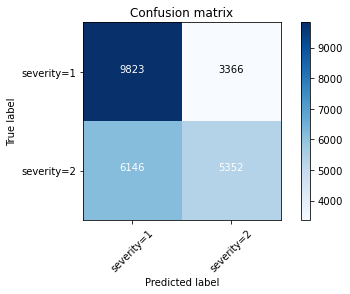

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y1_test, Y_hat_model1, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

The first row is for accidents whose actual severity value in test set is 1.
Obviously, out of 24687 accidents, the severity value of 13189 of them is 1. 
And out of these 13189, the classifier correctly predicted 9823 of them as 1, and 3366 of them as 2. 

It means, for 9823 accidents, the actual severity value was 1 in test set, and classifier also correctly predicted those as 1. However, while the actual severity of 3366 accidents were 1, the classifier predicted those as 2, which is relatively good.

While the second row. It looks like  there were 11498 accidents whom their severity value was 2. 

The classifier correctly predicted 5352 of them as 2, and 6146 of them wrongly as 1. So, it has not done a good job in predicting the accidents with severity value 2. We can consider it as error of model for second row. 

## Table of metrics
Inserting average the values of the evaluation carried out on the two models for both Classification algorithms in a table.

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| Decision Tree      | 0.61    | 0.67     | NA      |
| LogisticRegression | 0.61   | 0.67    | 0.64   |

The Evaluation of our model resulted in not perfect but also not the worst scores, as it is always preferable to have accuracy scores at least above 75%. Besides, the dataset used in this project had a lot of null values, which we don't have enough information to be able to predict them. Moreover, the target variable was greatly imbalanced, which affected our model significantly, although we tried to minimize its effect. Furthermore, many of the data observations were labeled Other and Unknown in some features, thus we had to drop them. Finally, the dataset lacked numeric data, which blocked us from using visualization or correlation in choosing the features. 


<h4>Recommendation on collecting information</h4>
In my opinion more observations need to be collected accurately without Unknown, Other or Null values. Also, it would be very useful to add more relatable numeric attributes like: horse power of the car, speed upon impact and age of the driver. Also starting to collect more information about drivers like gender, vision and social class because sometimes rich people are careless while driving. All of this information would be very helpful as they will allow correlation and visualization testing to take place, in order to find the most adequate features to use and create a more accurate model.  

## Conclusion

I have analyzed the dataset completely, applied an approach to deal with the imbalance in the dataset, chosen the most suitable features covering the circumstances of car accidents, dealt with null, Other, Unknown and values having same meaning, created classification models using two different algorithms and evaluated them using different metrics. The result was that most of the car accidents are of lower severity, however it can still be lethal. We can use our model in learning the circumstances that leads to accidents of different severity especially the higher ones, so that we remain careful and aware while designing new roads and building new cities. We will need to collect data more carefully and add new features like those suggested.